In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hr_train = pd.read_csv('train_LZdllcl.csv')
hr_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
hr_test = pd.read_csv('test_2umaH9m.csv')
hr_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
hr_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

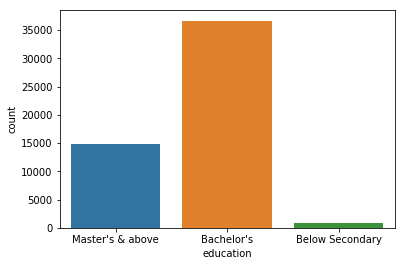

In [5]:
sns.countplot(hr_train['education'])
plt.show()

## maximum number of employees have bachelor's education

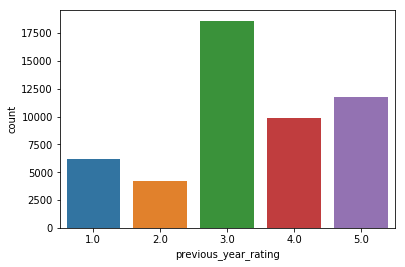

In [6]:
sns.countplot(hr_train['previous_year_rating'])
plt.show()

## maximum number of employees have average rating i.e 3.0

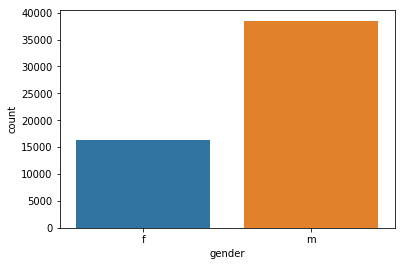

In [7]:
sns.countplot(hr_train['gender'])
plt.show()

In [8]:
hr_train['education'].describe()

count          52399
unique             3
top       Bachelor's
freq           36669
Name: education, dtype: object

In [9]:
hr_train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [10]:
hr_train['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [11]:
hr_train['education'] = hr_train['education'].fillna("Bachelor's")
hr_train['education'].value_counts()

## filling null values with Bachelor's

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [12]:
hr_train['previous_year_rating'].describe()

count    50684.000000
mean         3.329256
std          1.259993
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

In [13]:
hr_train['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [14]:
hr_train['previous_year_rating'].mean()

3.329255780917055

In [15]:
hr_train['previous_year_rating'].value_counts().sum()

50684

In [16]:
hr_train['previous_year_rating'].isnull().sum()

4124

In [17]:
hr_train['previous_year_rating'] = hr_train['previous_year_rating'].fillna(3)
hr_train['previous_year_rating'].value_counts()

## filling null values with 3

3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [18]:
def findBand(age):
    if age <=29:
        return 1
    elif age>29 and age<=33:
        return 2
    elif age>33 and age<=39:
        return 3
    else:
        return 4

hr_train['band'] = hr_train['age'].apply(findBand)

In [19]:
hr_train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
band                    0
dtype: int64

In [20]:
hr_train.groupby('KPIs_met >80%')['department'].value_counts()
## maximum KPI met is in the Sales & marketing and operations department

KPIs_met >80%  department       
0              Sales & Marketing    12376
               Operations            6460
               Technology            4680
               Procurement           4443
               Analytics             3189
               HR                    1610
               Finance               1484
               Legal                  692
               R&D                    583
1              Operations            4888
               Sales & Marketing     4464
               Procurement           2695
               Technology            2458
               Analytics             2163
               Finance               1052
               HR                     808
               R&D                    416
               Legal                  347
Name: department, dtype: int64

In [21]:
hr_train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'band'],
      dtype='object')

In [22]:
hr_train.groupby('awards_won?')['department'].value_counts()

## in some departments more no. of awards have been won therefore greater chances of getting promoted of these employees

awards_won?  department       
0            Sales & Marketing    16479
             Operations           11086
             Procurement           6967
             Technology            6953
             Analytics             5222
             Finance               2466
             HR                    2373
             Legal                 1014
             R&D                    978
1            Sales & Marketing      361
             Operations             262
             Technology             185
             Procurement            171
             Analytics              130
             Finance                 70
             HR                      45
             Legal                   25
             R&D                     21
Name: department, dtype: int64

In [23]:
hr_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 15 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
band                    54808 non-null int64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.3+ MB


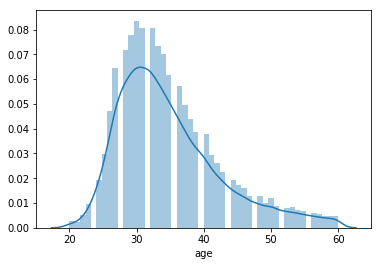

In [24]:
sns.distplot(hr_train['age'])
plt.show()

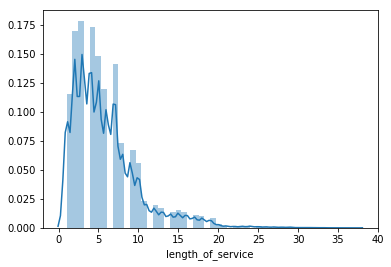

In [25]:
sns.distplot(hr_train['length_of_service'])
plt.show()

In [26]:
q1 = hr_train['length_of_service'].quantile(0.75)
q3 = hr_train['length_of_service'].quantile(0.25)
iqr = q3-q1
ul = q3+(1.5*iqr)
ll = q1-(1.5*iqr)

In [27]:
print(len(hr_train['length_of_service']>ul))

54808


In [28]:
def outlier(x):
    if x>ul:
        return(ul)
    elif x<ll:
        return(ll)
    else:
        return(x)
for i in ['length_of_service']:
  q1=hr_train[i].quantile(0.25)
  q3=hr_train[i].quantile(0.75)
  iqr=q3-q1
  ul=q3+(1.5*iqr)
  ll=q1-(1.5*iqr)
  hr_train[i]=hr_train[i].apply(outlier)
  hr_test[i]=hr_test[i].apply(outlier)

In [29]:
hr_train = pd.get_dummies(hr_train,drop_first=True)
hr_test = pd.get_dummies(hr_test,drop_first=True)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xg = XGBClassifier()

In [32]:
x = hr_train.drop('is_promoted',axis=1)
y = hr_train['is_promoted']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=hr_train.drop("is_promoted",axis=1)
y=hr_train.is_promoted
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
hr_test=pd.DataFrame(sc.transform(hr_test),columns=hr_test.columns)

C:\Users\amprl\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\amprl\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\amprl\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


ValueError: operands could not be broadcast together with shapes (23490,54) (55,) (23490,54) 

### Decision Tree Classifier

In [38]:
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)

In [39]:
dt.score(x_train, y_train)

1.0

In [40]:
dt.score(x_test, y_test)

0.9022684424983276

In [41]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     15057
           1       0.43      0.47      0.45      1386

   micro avg       0.90      0.90      0.90     16443
   macro avg       0.69      0.70      0.70     16443
weighted avg       0.91      0.90      0.90     16443



In [42]:
print(confusion_matrix(y_test, pred_dt))

[[14191   866]
 [  741   645]]


### RandomForest Classifier

In [43]:
rf.fit(x_train, y_train)

C:\Users\amprl\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
pred_rf = rf.predict(x_test)

In [45]:
rf.score(x_train, y_train)

0.9902775967678874

In [46]:
rf.score(x_test, y_test)

0.9298789758559873

In [47]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15057
           1       0.80      0.23      0.35      1386

   micro avg       0.93      0.93      0.93     16443
   macro avg       0.86      0.61      0.66     16443
weighted avg       0.92      0.93      0.91     16443



In [48]:
print(confusion_matrix(y_test, pred_rf))

[[14977    80]
 [ 1073   313]]


### XGB Classifier

In [49]:
xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [51]:
pred_xg = xg.predict(x_test)

In [52]:
xg.score(x_train, y_train)

0.9360615144011469

In [53]:
xg.score(x_test, y_test)

0.9376634434105698

In [54]:
print(classification_report(y_test, pred_xg))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15057
           1       0.97      0.27      0.42      1386

   micro avg       0.94      0.94      0.94     16443
   macro avg       0.95      0.63      0.69     16443
weighted avg       0.94      0.94      0.92     16443



In [55]:
print(confusion_matrix(y_test, pred_xg))

[[15046    11]
 [ 1014   372]]


In [ ]:
## XGB Classifier gives te best results